In [1]:
import os
import sys
import time
import random
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import contextlib
import logging
import openbabel
from openbabel import pybel
import rdkit

from random import randrange
from rdkit import Chem, RDLogger
from rdkit.Chem import MolFromSmiles as smi2mol
from rdkit.Chem import MolToSmiles as mol2smi
from rdkit.Chem import AllChem, rdMolAlign, Descriptors, Draw
from rdkit.Chem.rdchem import Mol
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity
from rdkit.Chem import rdFMCS, MolFromSmarts
from selfies import encoder, decoder 
from rdkit.Chem.Draw import MolToImage, IPythonConsole, rdMolDraw2D

import lomap

# Get the current working directory
current_dir = os.getcwd()

# Get the absolute path to the parent directory
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))

# Add the parent directory to sys.path
sys.path.insert(0, parent_dir)

# Now you can import the module
from generator import fingerprint
from generator import generation
from generator import filters
from generator import scoring
from generator import visualization

# Ignore warnings
RDLogger.DisableLog('rdApp.*')
warnings.filterwarnings('ignore')

In [12]:
perts_to_intrap = [
    ["tyk2", "lig_ejm_31~lig_ejm_44"], # easy example, should work
    ["tyk2", "lig_ejm_42~lig_ejm_49"],
    ["tyk2", "lig_ejm_31~lig_jmc_27"],
    ["tyk2", "lig_ejm_42~lig_jmc_28"],
    ["tyk2", "lig_jmc_30~lig_ejm_44"],
    ["tyk2", "lig_ejm_45~lig_ejm_49"],
    ["tyk2", "lig_jmc_30~lig_ejm_47"], # nice example of ring size changes (3 to 4 ring)
    ["tyk2", "lig_ejm_42~lig_ejm_48"],
]

In [13]:
# variables for generation

lig_path = f"/home/jiskootd/code/intermediate_generator/data/ligands/" # path to your ligand folder
num_tries = 2 # Number of path/chemical path attempts between the exact same smiles
num_random_smiles = 2 # Number of different SMILES string orderings to consider for starting_smile & target_smile
collect_bidirectional = True
fp_type="ECFP4"
num_random_samples = 1000    # number of generated intermediates per mutation in the local chemical space generation
num_mutation_ls    = [1,2]   # number of mutations per molecule in the local chemical space generation
n_rounds = 1    # number of rounds in the path-based generation
exponent_path = 1
exponent_local_chemical_space = 1
sdf = True
svg = True
png = False
scoring_method = "2D"
contribution_lomap = 0.5
contribution_similarity = 0.5

base_dir = f'/home/jiskootd/code/intermediate_generator/R-group/images_test/' # location to save images of pairs with intermediates

total number of path based generated intermediates:  348
total number of path based generated intermediates after filters:  2
['CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CC(C)(C)C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1'] [0.8571428571428571, 0.8571428571428571]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.2669951915740967


[12:44:03] WARNING: not removing hydrogen atom without neighbors


Mutation obtainment time (back to smiles):  2.184941053390503


[12:44:03] WARNING: not removing hydrogen atom without neighbors


Unique mutated structure obtainment time:  0.3723630905151367


[12:44:03] WARNING: not removing hydrogen atom without neighbors


Fingerprint calculation time:  0.3269658088684082
Total time:  3.1517510414123535
total number of generated local chemical space intermediates for smiles-pair:  1758


[12:44:04] WARNING: not removing hydrogen atom without neighbors


total number of generated local chemical space intermediates after filters for smiles-pair:  3

total number of unique generated local chemical space intermediates:  3
these are the final smiles: ['CCC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)c(C)cn1', 'CC(=O)Nc1cc(NC(=O)c2c(Cl)ccc(N)c2Cl)ccn1']


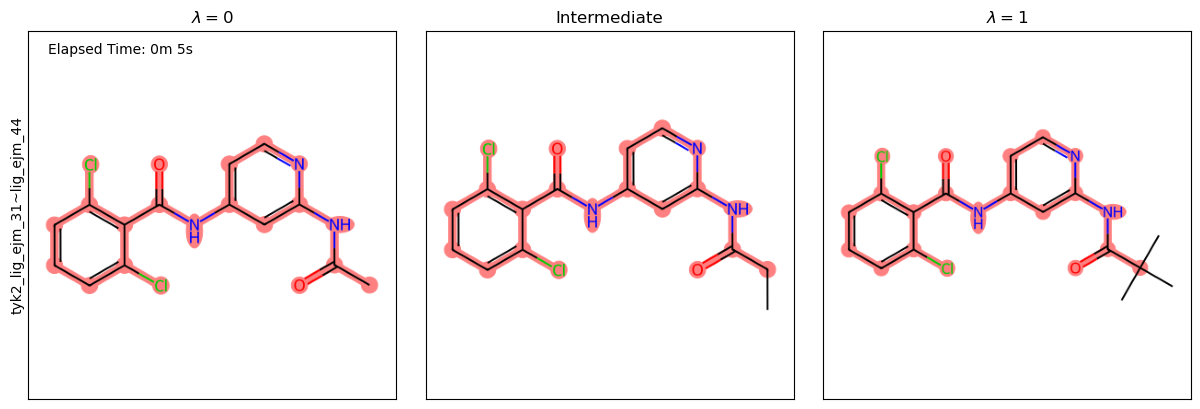

total number of path based generated intermediates:  516
total number of path based generated intermediates after filters:  6
['O=C(Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1)c1ccccc1', 'CCC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=C(CO)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=CNc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C=CC=CC=CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C#CC=CC=CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1'] [0.810126582278481, 0.810126582278481, 0.7422133863485751, 0.6666666666666667, 0.5981308411214954, 0.5871559633027522]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.3239905834197998
Mutation obtainment time (back to smiles):  2.5789403915405273
Unique mutated structure obtainment time:  0.4812474250793457
Fingerprint calculation time:  0.4409365653991699
Total time:  3.825576066970825
total number of generated local chemical space intermediates for smiles-pair:  1830
total number of generated local chemical space intermediates after filters for smiles-pa

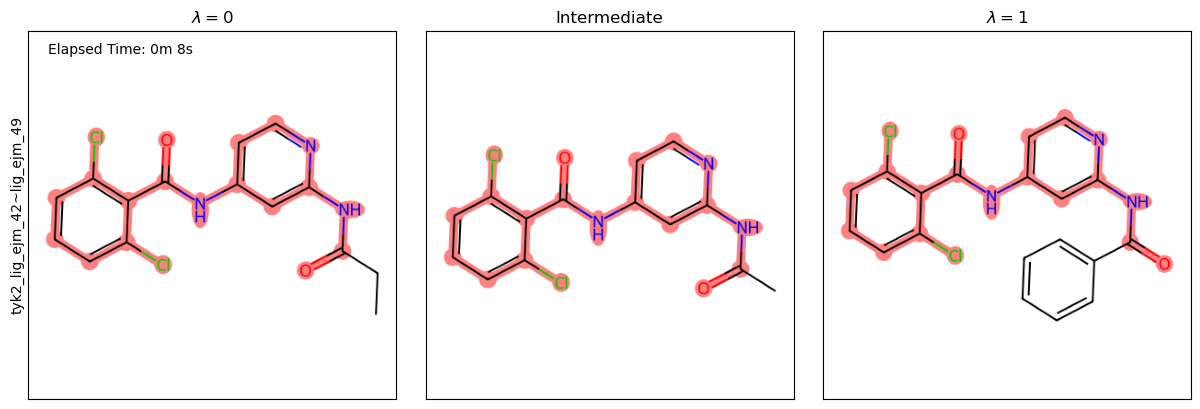

total number of path based generated intermediates:  408
total number of path based generated intermediates after filters:  5
['O=C(Nc1ccnc(NC(=O)C2C[C@H]2Cl)c1)c1c(Cl)cccc1Cl', 'O=C(Nc1ccnc(NC(=O)[C@H]2C[C@H]2Cl)c1)c1c(Cl)cccc1Cl', 'CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=C([CH]C[CH]Cl)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1'] [0.8, 0.8, 0.8, 0.7447916666666666, 0.627450980392157]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.335665225982666
Mutation obtainment time (back to smiles):  3.4296913146972656
Unique mutated structure obtainment time:  0.45536065101623535
Fingerprint calculation time:  0.40569257736206055
Total time:  4.626879930496216
total number of generated local chemical space intermediates for smiles-pair:  1827
total number of generated local chemical space intermediates after filters for smiles-pair:  12

total number of unique generated local chemical space intermediates:

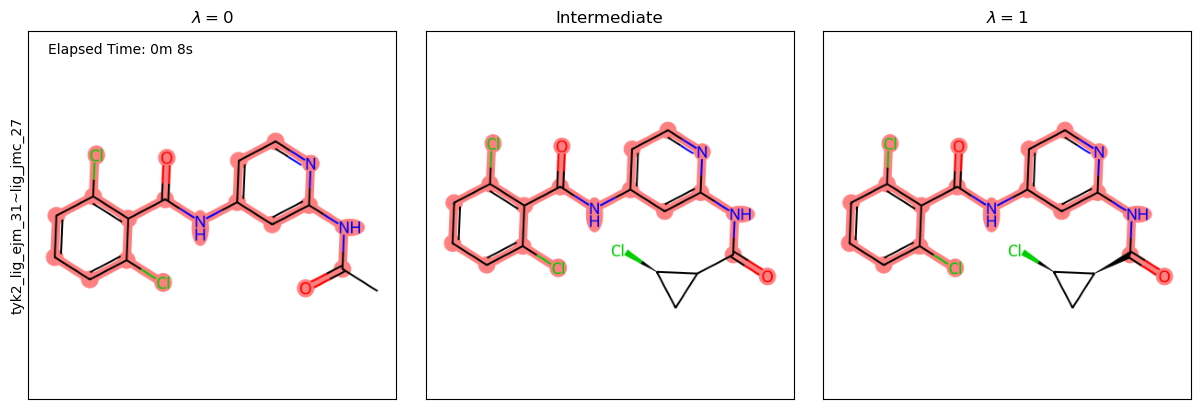

total number of path based generated intermediates:  408
total number of path based generated intermediates after filters:  2
['C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CCC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1'] [0.7857142857142858, 0.7857142857142858]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.34217238426208496
Mutation obtainment time (back to smiles):  3.541825294494629
Unique mutated structure obtainment time:  0.4680149555206299
Fingerprint calculation time:  0.4154975414276123
Total time:  4.767986536026001
total number of generated local chemical space intermediates for smiles-pair:  1837
total number of generated local chemical space intermediates after filters for smiles-pair:  7

total number of unique generated local chemical space intermediates:  7
these are the final smiles: ['CC(C)OC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C=CCC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)

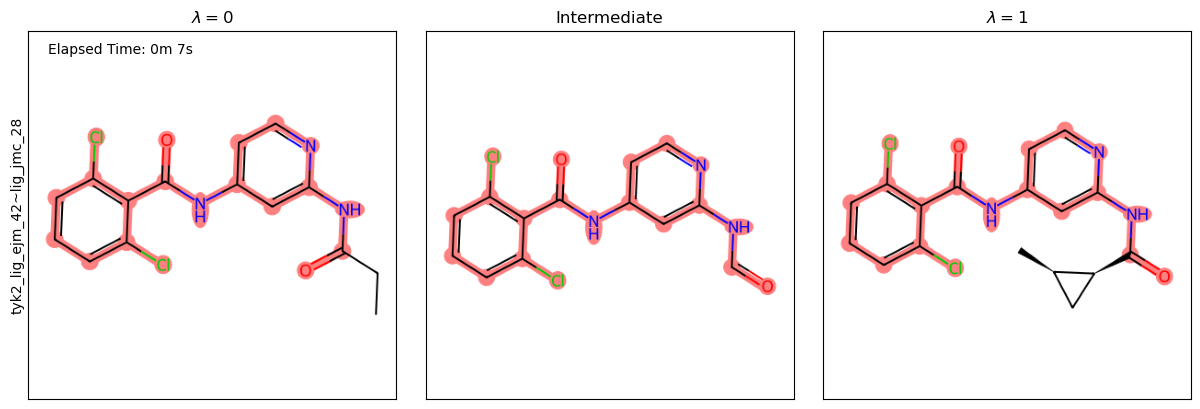

total number of path based generated intermediates:  480
total number of path based generated intermediates after filters:  5
['N#C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CC(C)(C)C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C#C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', '[CH]C(C)(C)C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N#C[CH]C=CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1'] [0.7272727272727273, 0.7272727272727273, 0.683047902705386, 0.660345789180145, 0.5825747724317296]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.35546255111694336


[12:44:34] WARNING: not removing hydrogen atom without neighbors
[12:44:35] WARNING: not removing hydrogen atom without neighbors


Mutation obtainment time (back to smiles):  3.7248475551605225


[12:44:36] WARNING: not removing hydrogen atom without neighbors


Unique mutated structure obtainment time:  0.46753883361816406


[12:44:36] WARNING: not removing hydrogen atom without neighbors


Fingerprint calculation time:  0.4162251949310303
Total time:  4.964511394500732
total number of generated local chemical space intermediates for smiles-pair:  1822


[12:44:36] WARNING: not removing hydrogen atom without neighbors


total number of generated local chemical space intermediates after filters for smiles-pair:  16

total number of unique generated local chemical space intermediates:  16
these are the final smiles: ['C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N#CN[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C=C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CC=CC=NC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N#C[C@@H]1CN1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N#C[C@@H]1C[C@@H]1C(=O)Nc1cc(N(N)C(=O)c2c(Cl)cccc2Cl)ccn1', 'N#CC=CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CNC=CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=C(Nc1ccnc(NC(=O)C2CC2)c1)c1c(Cl)cccc1Cl', 'O=C(Nc1ccnc(NC(=O)C2C=C2)c1)c1c(Cl)cccc1Cl', 'O=CNc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C=CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CC(C)NC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N#C[C@@H]1O[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C[C@H](C#N)C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)

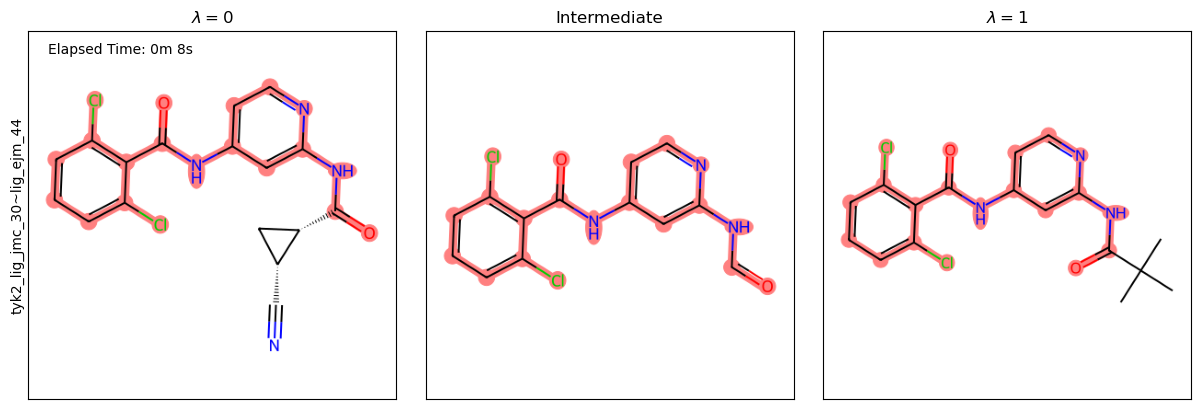

total number of path based generated intermediates:  420
total number of path based generated intermediates after filters:  6
['O=C(CC1CC1)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=C(Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1)c1ccccc1', 'O=C(CN1CC1)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CCCCC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C=C=C=CC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=C(Nc1ccnc(NC(=O)C2C=CC=CC2)c1)c1c(Cl)cccc1Cl'] [0.7710843373493976, 0.7710843373493976, 0.6582857142857143, 0.6434932490663602, 0.6125290023201856, 0.5840042941492217]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.30739808082580566
Mutation obtainment time (back to smiles):  2.5049617290496826
Unique mutated structure obtainment time:  0.44933152198791504
Fingerprint calculation time:  0.40606045722961426
Total time:  3.6682305335998535
total number of generated local chemical space intermediates for smiles-pair:  1813
total number of generated local chemical space intermediates after fi

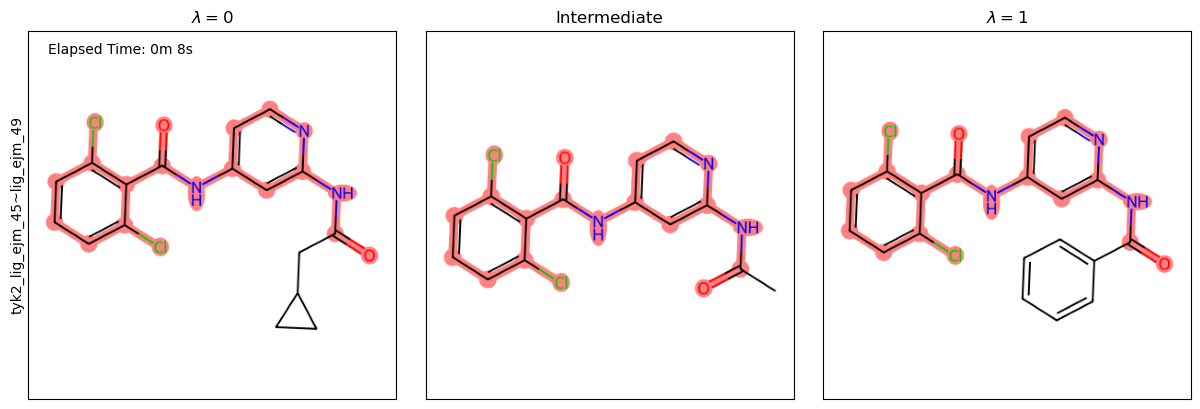

total number of path based generated intermediates:  420
total number of path based generated intermediates after filters:  3
['N#C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=C(Nc1ccnc(NC(=O)C2CCC2)c1)c1c(Cl)cccc1Cl', 'O=C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1'] [0.8089887640449438, 0.8089887640449438, 0.6943620178041543]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.3530235290527344


[12:44:50] WARNING: not removing hydrogen atom without neighbors
[12:44:51] WARNING: not removing hydrogen atom without neighbors


Mutation obtainment time (back to smiles):  3.5915026664733887


[12:44:53] WARNING: not removing hydrogen atom without neighbors


Unique mutated structure obtainment time:  0.46039247512817383


[12:44:53] WARNING: not removing hydrogen atom without neighbors


Fingerprint calculation time:  0.40502357482910156
Total time:  4.8104047775268555
total number of generated local chemical space intermediates for smiles-pair:  1800


[12:44:54] WARNING: not removing hydrogen atom without neighbors


total number of generated local chemical space intermediates after filters for smiles-pair:  4

total number of unique generated local chemical space intermediates:  4
these are the final smiles: ['C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'C[C@@H]1NC[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'N#C[C@@H]1C[C@@H]1C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)c(N)cn1']


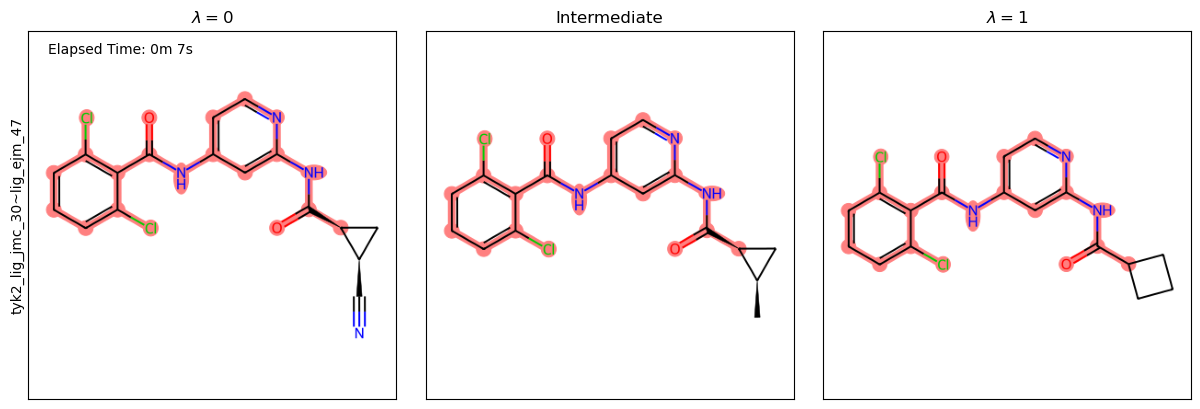

total number of path based generated intermediates:  396
total number of path based generated intermediates after filters:  3
['O=C(Nc1ccnc(NC(=O)C2CCCC2)c1)c1c(Cl)cccc1Cl', 'CCC(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'O=C(Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1)C1=CCCC1'] [0.7901234567901235, 0.7901234567901235, 0.6278130409694173]
Number of unique top1-scoring intermediates:  1
Randomized molecules (in SELFIES) time:  0.31710028648376465
Mutation obtainment time (back to smiles):  2.528245687484741
Unique mutated structure obtainment time:  0.4525108337402344
Fingerprint calculation time:  0.3982117176055908
Total time:  3.696530342102051
total number of generated local chemical space intermediates for smiles-pair:  1784
total number of generated local chemical space intermediates after filters for smiles-pair:  24

total number of unique generated local chemical space intermediates:  24
these are the final smiles: ['CCCC(C)C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1', 'CCC(CC)C(=O)Nc1cc(NC(=O)c2c(Cl

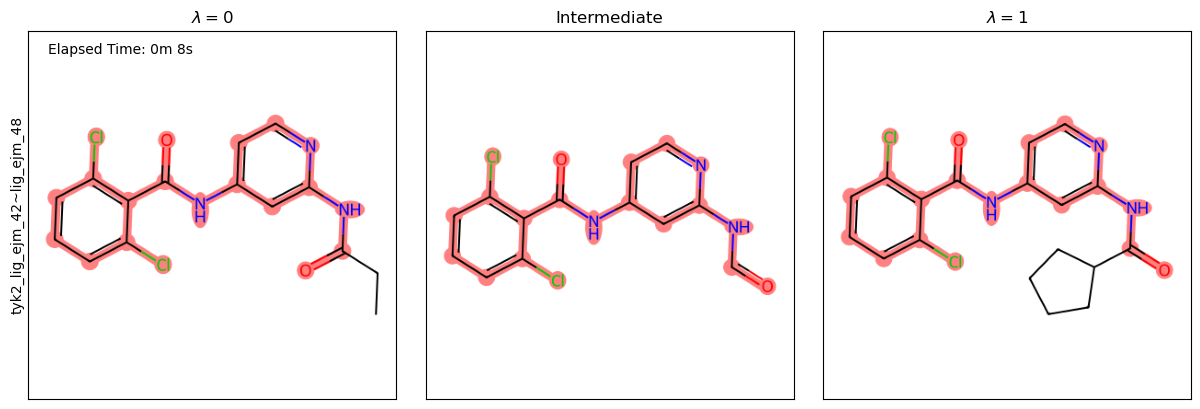

In [14]:
for tgt, pert in perts_to_intrap:
    
    # Insert time stamp
    start_time = time.time()    
    
    # Get the endpoint molecular objects.
    orig_liga, orig_ligb = pert.split("~")
    
    liga, ligb = None, None  # Initialize these to None

    liga = visualization.fetch_molecule(tgt, orig_liga, lig_path, ".sdf") or visualization.fetch_molecule(tgt, orig_liga, lig_path, ".mol2")
    ligb = visualization.fetch_molecule(tgt, orig_ligb, lig_path, ".sdf") or visualization.fetch_molecule(tgt, orig_ligb, lig_path, ".mol2")
    
    # Check if you successfully obtained the molecular objects
    if liga is None or ligb is None:
        raise ValueError("Failed to fetch molecules.")
    
    liga_smiles = Chem.MolToSmiles(liga)
    ligb_smiles = Chem.MolToSmiles(ligb)

    
    # generate multiple paths
    if scoring_method == "3D":
#        generated_paths = generation.generate_multiple_paths_rocs(liga_smiles, ligb_smiles, num_tries, num_random_smiles, collect_bidirectional, exponent_path, n_rounds=n_rounds, fp_type=fp_type)
        generated_paths = generation.generate_multiple_paths_rocs(liga_smiles, ligb_smiles, num_tries, num_random_smiles, collect_bidirectional, exponent_path, n_rounds=n_rounds, fp_type=fp_type)
    else: 
        generated_paths = generation.generate_multiple_paths(liga_smiles, ligb_smiles, num_tries, num_random_smiles, collect_bidirectional, exponent_path, n_rounds=n_rounds, fp_type=fp_type)
        
    # generate local subspace of molecules 
    generated_mols = generation.generate_chemical_space(liga_smiles, ligb_smiles, generated_paths, num_random_samples, num_mutation_ls, fp_type=fp_type)
    
    # score molecules
    if scoring_method == "3D":
        sorted_smiles_dict = scoring.score_molecules_lomap_rocs(liga_smiles, ligb_smiles, generated_mols, exponent_local_chemical_space, contribution_lomap, contribution_similarity)
    else:
        sorted_smiles_dict = scoring.score_molecules_lomap_tanimoto(liga_smiles, ligb_smiles, generated_mols, exponent_local_chemical_space, contribution_lomap, contribution_similarity)
        
        
    # select the final smiles string
    selected_intermediate = next(iter(sorted_smiles_dict))
    
    # Create a filename using tgt and pert
    filename = f'{tgt}_{pert}'
    filepath = f'{base_dir}/{filename}'
    filepath_intermediate = f'{base_dir}/intermediate_{filename}.sdf'
    
    # Align the selected intermediate to the reference molecules and save to sdf file
    if sdf == True:
        visualization.align_intermediates_to_references(liga, ligb, selected_intermediate, filepath_intermediate, n_conformers=10)
    
    # stop the timer and calculate the elapsed time
    elapsed_time = time.time() - start_time
    # convert elapsed time to minutes and seconds
    mins, secs = divmod(elapsed_time, 60)
    
    # visualize triplet
    visualization.visualise(liga_smiles, ligb_smiles, selected_intermediate, mins, secs, filepath, filename, svg=svg, png=png)

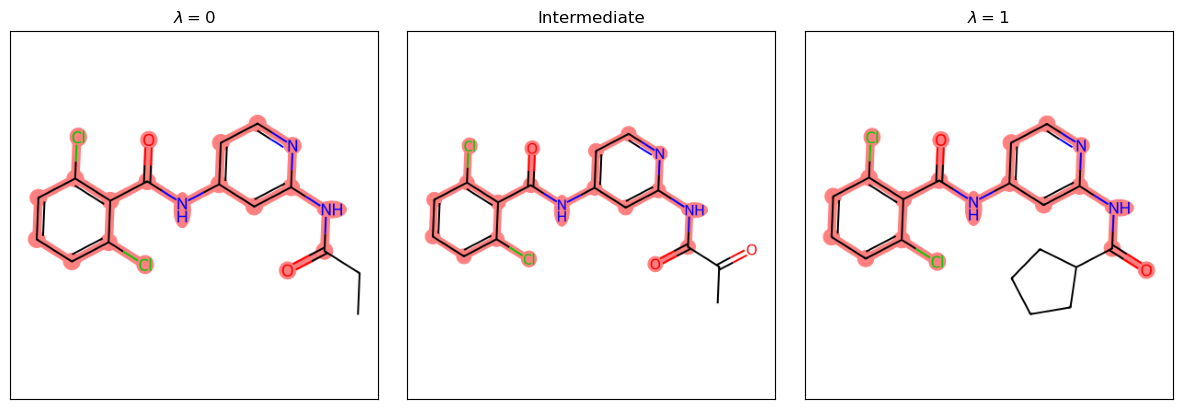

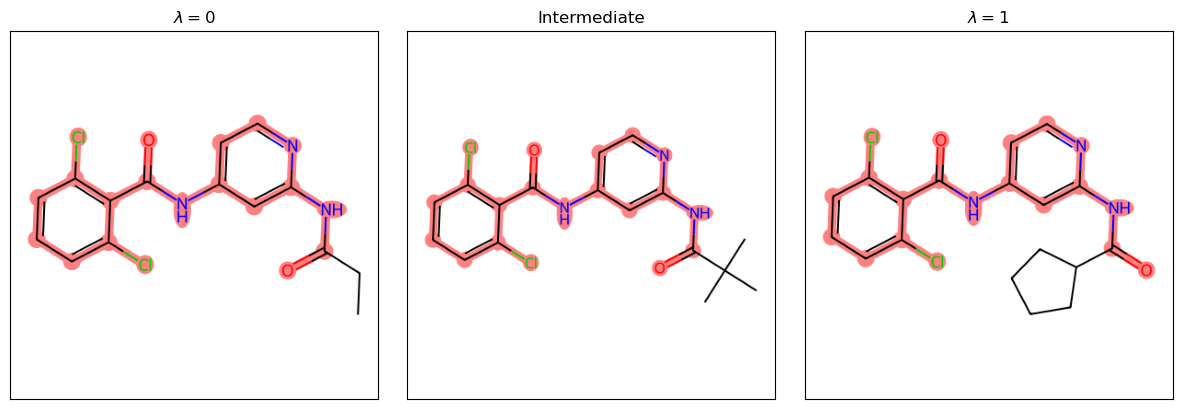

In [24]:
def visualise(liga_smiles, ligb_smiles, selected_intermediate_smiles):
    """
    Visualise and save an image of three aligned ligands with the Maximum Common Substructure (MCS) highlighted.
    
    Args:
        liga_smiles, ligb_smiles, selected_intermediate_smiles (str): The SMILES strings for the ligands to visualize.
        mins, secs (int): The minutes and seconds elapsed.
        filepath (str): The path to the location where the image is to be saved.
        filename (str): The name of the file.
    """
    # get intermediate
    liga = Chem.MolFromSmiles(liga_smiles)
    ligb = Chem.MolFromSmiles(ligb_smiles)
    intermediate = Chem.MolFromSmiles(selected_intermediate_smiles)

    # find MCS of the 3 molecules
    mcs_mol = filters.find_mcs_3_mols(liga_smiles, ligb_smiles, selected_intermediate_smiles)

    # Align ligands 
    molecules = visualization.alignLigands(liga, intermediate, ligb)

    # Set up the figure
    fig, axes = plt.subplots(1, 3, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 1, 1]})

    # Generate the images with the MCS highlighted
    img0 = visualization.draw_molecule_with_mcs(liga, mcs_mol)
    img1 = visualization.draw_molecule_with_mcs(intermediate, mcs_mol)
    img2 = visualization.draw_molecule_with_mcs(ligb, mcs_mol)

    # Plot the images
    axes[0].imshow(img0)
    axes[1].imshow(img1)
    axes[2].imshow(img2)


    # Turn off axes and set titles.
    titles = ["$\lambda = 0$", "Intermediate", "$\lambda = 1$"]
    for ax, title in zip(axes, titles):
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        ax.set_title(title)

    # set spacing between plots
    plt.subplots_adjust(wspace=0.08)



    plt.show()


visualise(liga_smiles, ligb_smiles, 'CC(=O)C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1')
visualise(liga_smiles, ligb_smiles, 'CC(C)(C)C(=O)Nc1cc(NC(=O)c2c(Cl)cccc2Cl)ccn1')